In [30]:
import csv
with open(fileName, 'rb') as f:
    reader = csv.reader(f)
    header = next(reader)
    data = list(reader)
    
header = labels = ['created_at', 'tweet_id', 'retweet_count', 'reply_user_id', 'reply_tweet_id', 'text', 'tags', 'ids', 'names',
    'user_id', 'name', 'screen_name', 'friends_count', 'followers_count', 'statuses_count',   
    'ori_created_at', 'ori_tweet_id', 'ori_retweet_count', 'ori_user_id', 
    'ori_name', 'ori_screen_name', 'ori_friends_count', 'ori_followers_count', 'ori_statuses_count']

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

names = ['HillaryClinton']#,'BernieSanders','DonaldTrump']
types = ['DataUserConverted2']

# Combine them and save them
for i in range(len(names)) :
    print 'Processing %s' %(names[i])
    fileName = "./FinalData/%s%s.csv" %(names[i], types[0])
    
    with open(fileName, 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)                
    


Processing HillaryClinton


### Plot the degree distribution

MentionFreqIn (gamma=1.7900, R-sq=0.1710)
MentionFreqOut (gamma=2.4400, R-sq=0.9355)
ReplyFreqIn (gamma=2.2200, R-sq=0.2372)
ReplyFreqOut (gamma=2.9000, R-sq=0.4549)
RetweetFreqIn (gamma=1.7200, R-sq=0.3093)
RetweetFreqOut (gamma=2.3400, R-sq=0.9356)


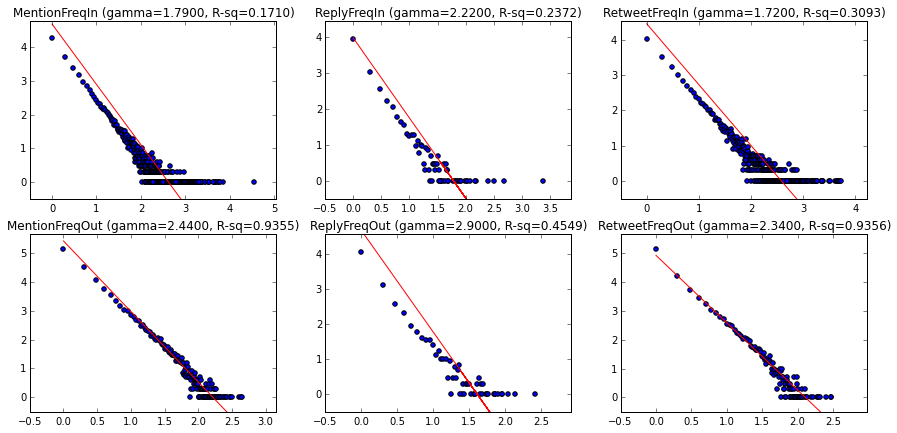

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
from collections import defaultdict



names = ['DonaldTrump'] # ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['MentionFreq','ReplyFreq','RetweetFreq']
subtypes = ['In','Out']

# Combine them and save them
for i in range(len(names)) :
    fileNameOnly = "./FinalData/%s" %(names[i])
    plt.figure(i, figsize = (15,7))
    for j in range(len(types)):
        for k in range(len(subtypes)):
            fileRead = "%s%s%s.csv" %(fileNameOnly, types[j],subtypes[k])
            fileWrite = "%s%s%s%s.csv" %(fileNameOnly, types[j],subtypes[k],"Matlab")
        
            with open(fileRead, 'rb') as f:
                reader = csv.reader(f)
                data = list(reader)

            loc = '%d%d%d' %(len(subtypes),len(types), j+k*len(types)+1)
            plt.subplot(int(loc))
            
            vals = []
            freq = defaultdict(int)
            for a in range(len(data)):
                freq[int(data[a][1])] += 1
                vals.append(int(data[a][1]))
        
            x = list(freq.keys())
            y = list(freq.values())
            
            with open(fileWrite,'wb') as fp:
                a = csv.writer(fp,delimiter=',') 
                for elem in x:
                    a.writerow([elem,freq[elem]])
                    
            xlog = np.log10(x)
            ylog = np.log10(y)
            
            plt.scatter(xlog,ylog)
            plt.xlim(-0.5,max(xlog)+0.5)
            plt.ylim(-0.5,max(ylog)+0.5)
            
            sample_size = 5000
            sample = random.sample(vals, sample_size)
            
            [alpha, xmin, L] = plfit(sample)
            
            bestB = 0;
            bestMSE = sum(ylog);
            
            bcandidates = np.linspace(0,8,100)
            for bcandidate in bcandidates:
                diff = -1*alpha*xlog + bcandidate - ylog
                diffsq = np.power(diff,2)
                mse = np.mean(diffsq)
                if(mse < bestMSE):
                    bestMSE = mse
                    bestB = bcandidate
                    
            yhat = -1*alpha*xlog + bestB
                
            # fit values, and mean
            ybar = np.sum(ylog)/len(ylog)          
            sstot = np.sum((ylog - ybar)**2)   
            ssres = np.sum((ylog - yhat)**2)    
            rsq = 1 - (ssres / sstot)
        
                
            
            #gamma, b = np.polyfit(xlog, ylog, 1)
            plt.plot(xlog, -1*alpha*xlog + bestB, 'r-')
            
            title = '%s%s (gamma=%s, R-sq=%s)' %(types[j], subtypes[k], "{:.4f}".format(alpha), "{:.4f}".format(rsq))
            print title
            plt.title(title)

In [ ]:
names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['MentionFreq','ReplyFreq','RetweetFreq']
subtypes = ['In','Out']

# Combine them and save them
for i in range(len(names)) :
    fileNameOnly = "./FinalData/%s" %(names[i])
    plt.figure(i, figsize = (15,7))
    for j in range(len(types)):
        for k in range(len(subtypes)):
            fileRead = "%s%s%s.csv" %(fileNameOnly, types[j],subtypes[k])
            fileWrite = "%s%s%s%s.csv" %(fileNameOnly, types[j],subtypes[k],"Matlab")
        
            with open(fileRead, 'rb') as f:
                reader = csv.reader(f)
                data = list(reader)

            loc = '%d%d%d' %(len(subtypes),len(types), j+k*len(names)+1)
            plt.subplot(int(loc))

### Plot Combined Degree Distribution, fit with plfit

Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
HillaryClintonInEdges (gamma = 1.7300, R-sq = 0.3503)
Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
HillaryClintonOutEdges (gamma = 2.2500, R-sq = 0.9098)
Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
BernieSandersInEdges (gamma = 1.8200, R-sq = 0.2956)
Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
BernieSandersOutEdges (gamma = 2.2700, R-sq = 0.8860)
Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
DonaldTrumpInEdges (gamma = 1.8000, R-sq = 0.3137)
Data read
Frequency exported
Sampling Comlpete. Computing plfit
plfit complete. Now finding best B
DonaldTrumpOutEdges (gamma = 2.3400, R-sq = 0.9536)


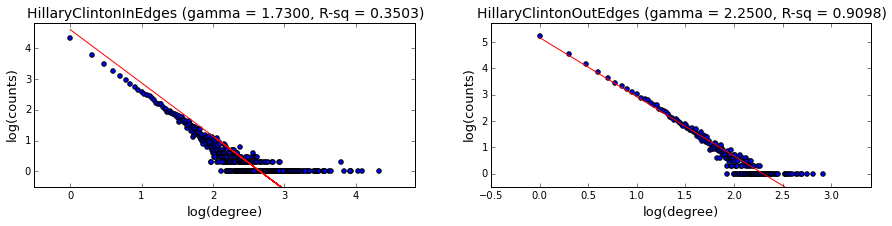

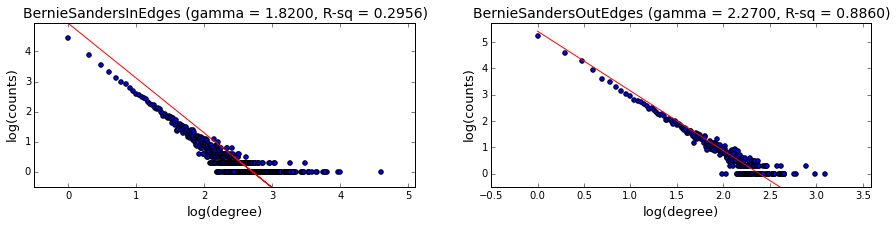

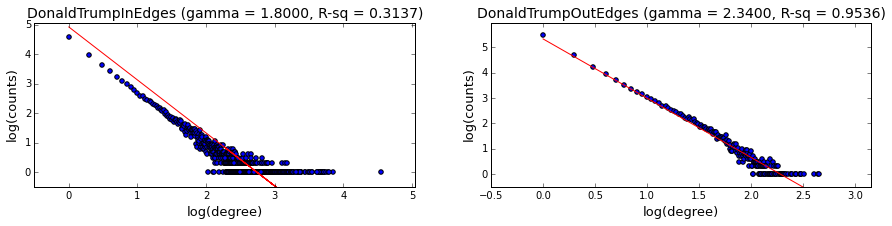

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
import numpy


from collections import defaultdict

names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['InEdges','OutEdges']
subtypes = ['In','Out']

# Combine them and save them
for i in range(len(names)) :
    fileNameOnly = "./FinalData/%s" %(names[i])
    plt.figure(i, figsize = (15,10))
    for j in range(len(types)):
        fileRead = "%s%s.csv" %(fileNameOnly, types[j])
        fileWrite = "%s%s%s.csv" %(fileNameOnly, types[j],"Matlab")
        
        fileMention = "%s%s%s%s.csv" %(fileNameOnly, 'MentionFreq', subtypes[j],'Matlab')
        fileReply = "%s%s%s%s.csv" %(fileNameOnly, 'ReplyFreq', subtypes[j],'Matlab')
        fileRetweet = "%s%s%s%s.csv" %(fileNameOnly, 'RetweetFreq', subtypes[j],'Matlab')
        with open(fileMention, 'rb') as f:
            reader = csv.reader(f)
            data_Mention = list(reader)
        with open(fileReply, 'rb') as f:
            reader = csv.reader(f)
            data_Reply = list(reader)
        with open(fileRetweet, 'rb') as f:
            reader = csv.reader(f)
            data_Retweet = list(reader)
            
        total = defaultdict(int)
        vals = []
        
        for temp in range(len(data_Mention)):
            value = int(data_Mention[temp][0])
            for rep in range(int(data_Mention[temp][1])):
                vals.append(value)
            total[int(data_Mention[temp][0])] += int(data_Mention[temp][1])
        for temp in range(len(data_Reply)):
            value = int(data_Reply[temp][0])
            for rep in range(int(data_Reply[temp][1])):
                vals.append(value)
            total[int(data_Reply[temp][0])] += int(data_Reply[temp][1])
        for temp in range(len(data_Retweet)):
            value = int(data_Retweet[temp][0])
            for rep in range(int(data_Retweet[temp][1])):
                vals.append(value)
            total[int(data_Retweet[temp][0])] += int(data_Retweet[temp][1])
    
            
        print 'Data read'
            
        loc = '%d%d%d' %(len(names),len(types), j+i*len(types)+1)
        plt.subplot(int(loc))
        
        
        totalVals = list(total.keys())
        totalFreq = list(total.values())
        totalVals = np.log10(totalVals)
        totalFreq = np.log10(totalFreq)
        
        with open(fileWrite,'wb') as fp:
            a = csv.writer(fp,delimiter=',') 
            for elem in totalVals:
                a.writerow([elem,total[elem]])
                
        print 'Frequency exported'
        
        plt.xlim(-0.5,max(totalVals)+0.5)
        plt.ylim(-0.5,max(totalFreq)+0.5)
        
        plt.scatter(totalVals, totalFreq)
        
        
        plt.xlabel('log(degree)', fontsize= 13)
        plt.ylabel('log(counts)',fontsize = 13)
        
                
        sample_size = 5000
        sample = random.sample(vals, sample_size)
        print 'Sampling Comlpete. Computing plfit'

        [alpha, xmin, L] = plfit(sample)
        print 'plfit complete. Now finding best B'

        bestB = 0;
        bestMSE = sum(totalFreq);
        
        


        bcandidates = np.linspace(0,8,100)
        for bcandidate in bcandidates:
            diff = -1*alpha*totalVals + bcandidate - totalFreq
            diffsq = np.power(diff,2)
            mse = np.mean(diffsq)
            if(mse < bestMSE):
                bestMSE = mse
                bestB = bcandidate
                
        yhat = -1*alpha*totalVals + bestB
                
        # fit values, and mean
        ybar = numpy.sum(totalFreq)/len(totalFreq)          # or sum(y)/len(y)
        sstot = numpy.sum((totalFreq - ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        ssres = numpy.sum((totalFreq - yhat)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        rsq = 1 - (ssres / sstot)

        
        plt.plot(totalVals, -1*alpha*totalVals + bestB, 'r-')
        title = '%s%s (gamma = %s, R-sq = %s)' %(names[i], types[j], "{:.4f}".format(alpha),"{:.4f}".format(rsq))
        
        print title
        plt.title(title, fontsize = 14)

### Plot combined degree distribution, fit with polyfit

Data read
Frequency exported
HillaryClintonInEdges (gamma = 1.0069, R-sq = 0.7267)
Data read
Frequency exported
HillaryClintonOutEdges (gamma = 2.0979, R-sq = 0.9148)
Data read
Frequency exported
BernieSandersInEdges (gamma = 1.0244, R-sq = 0.7499)
Data read
Frequency exported
BernieSandersOutEdges (gamma = 1.9113, R-sq = 0.9186)
Data read
Frequency exported
DonaldTrumpInEdges (gamma = 1.0247, R-sq = 0.7340)
Data read
Frequency exported
DonaldTrumpOutEdges (gamma = 2.3312, R-sq = 0.9541)


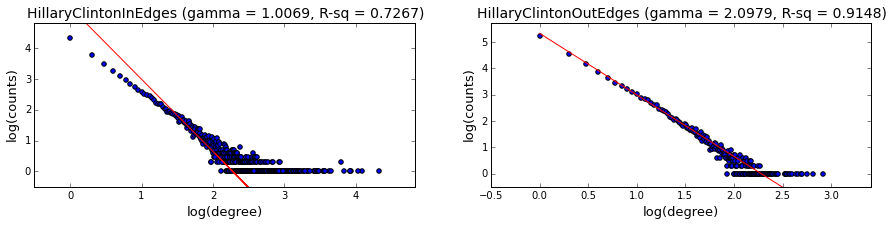

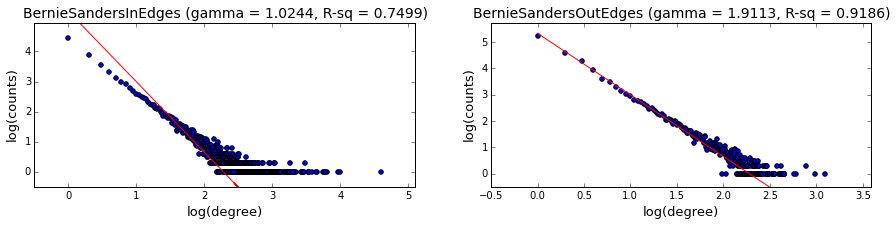

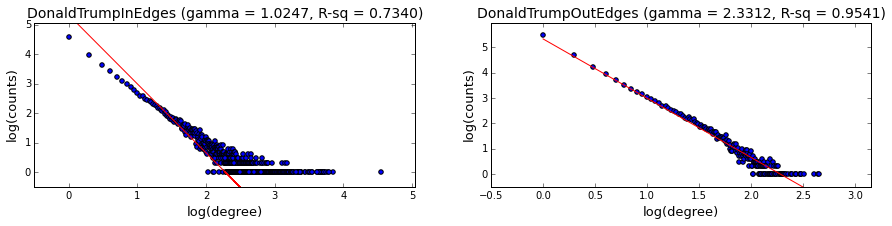

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
import numpy


from collections import defaultdict

names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['InEdges','OutEdges']
subtypes = ['In','Out']

# Combine them and save them
for i in range(len(names)) :
    fileNameOnly = "./FinalData/%s" %(names[i])
    plt.figure(i, figsize = (15,10))
    for j in range(len(types)):
        fileRead = "%s%s.csv" %(fileNameOnly, types[j])
        fileWrite = "%s%s%s.csv" %(fileNameOnly, types[j],"Matlab")
        
        fileMention = "%s%s%s%s.csv" %(fileNameOnly, 'MentionFreq', subtypes[j],'Matlab')
        fileReply = "%s%s%s%s.csv" %(fileNameOnly, 'ReplyFreq', subtypes[j],'Matlab')
        fileRetweet = "%s%s%s%s.csv" %(fileNameOnly, 'RetweetFreq', subtypes[j],'Matlab')
        with open(fileMention, 'rb') as f:
            reader = csv.reader(f)
            data_Mention = list(reader)
        with open(fileReply, 'rb') as f:
            reader = csv.reader(f)
            data_Reply = list(reader)
        with open(fileRetweet, 'rb') as f:
            reader = csv.reader(f)
            data_Retweet = list(reader)
            
        total = defaultdict(int)
        vals = []
        
        for temp in range(len(data_Mention)):
            value = int(data_Mention[temp][0])
            for rep in range(int(data_Mention[temp][1])):
                vals.append(value)
            total[int(data_Mention[temp][0])] += int(data_Mention[temp][1])
        for temp in range(len(data_Reply)):
            value = int(data_Reply[temp][0])
            for rep in range(int(data_Reply[temp][1])):
                vals.append(value)
            total[int(data_Reply[temp][0])] += int(data_Reply[temp][1])
        for temp in range(len(data_Retweet)):
            value = int(data_Retweet[temp][0])
            for rep in range(int(data_Retweet[temp][1])):
                vals.append(value)
            total[int(data_Retweet[temp][0])] += int(data_Retweet[temp][1])
    
            
        print 'Data read'
            
        loc = '%d%d%d' %(len(names),len(types), j+i*len(types)+1)
        plt.subplot(int(loc))
        
        
        totalVals = list(total.keys())
        totalFreq = list(total.values())
        totalVals = np.log10(totalVals)
        totalFreq = np.log10(totalFreq)
        
        with open(fileWrite,'wb') as fp:
            a = csv.writer(fp,delimiter=',') 
            for elem in totalVals:
                a.writerow([elem,total[elem]])
                
        print 'Frequency exported'
        
        plt.xlim(-0.5,max(totalVals)+0.5)
        plt.ylim(-0.5,max(totalFreq)+0.5)
        
        plt.scatter(totalVals, totalFreq)
        
        
        plt.xlabel('log(degree)', fontsize= 13)
        plt.ylabel('log(counts)',fontsize = 13)
        
        
        gamma, b = np.polyfit(totalVals, totalFreq, 1)
        
        yhat = gamma*totalVals  + b
                
        # fit values, and mean
        ybar = numpy.sum(totalFreq)/len(totalFreq)          # or sum(y)/len(y)
        sstot = numpy.sum((totalFreq - ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        ssres = numpy.sum((totalFreq - yhat)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        rsq = 1 - (ssres / sstot)

        
        plt.plot(totalVals, -1*alpha*totalVals + bestB, 'r-')
        title = '%s%s (gamma = %s, R-sq = %s)' %(names[i], types[j], "{:.4f}".format(-1*gamma),"{:.4f}".format(rsq))
        
        print title
        plt.title(title, fontsize = 14)

### Look at the frequency of Retweet

Processing HillaryClinton
['1453979514.0', '692590907707805696', '3', '-1', '', 'RT @Market_JP: Hillary Clinton said Monday she is the only candidate who would exercise\nthe leadership needed to end the war in Iraq.\n\n[IMA\xe2\x80\xa6', '[]', '[16334]', "[u'Market_JP']", '120579', 'Luxury', 'LXRYx', '139', '187', '10639', '1205830402.0', '773178971', '3', '16334', 'Market_JP', 'Market_JP', '2', '351', '1560753']
311
HillaryClinton Retweets Time Difference (Time vs log(Counts))
Processing BernieSanders
312
BernieSanders Retweets Time Difference (Time vs log(Counts))
Processing DonaldTrump
['1454039389.0', '692842038753005568', '67', '-1', '', 'RT @realDonaldTrump: Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!', '[]', "[[3, 'Unknown']]", "[u'Donald J. Trump']", '215205', 'Chim', 'ChimRR', '803', '581', '14207', '1241477665.0', '1698308935', '67', '3', 'Donald J. Trump', 'realDonaldTrump', '49', '5994126', '30604']
3

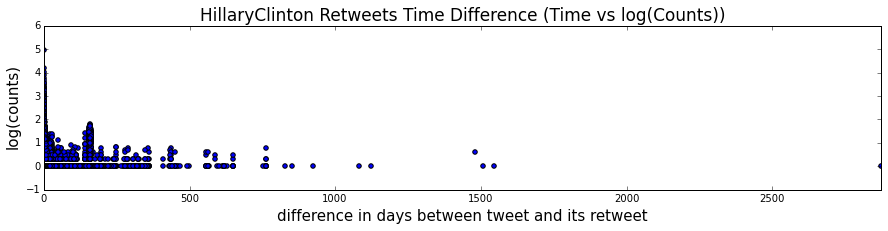

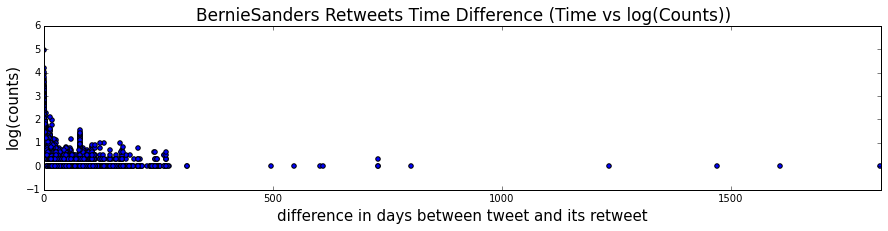

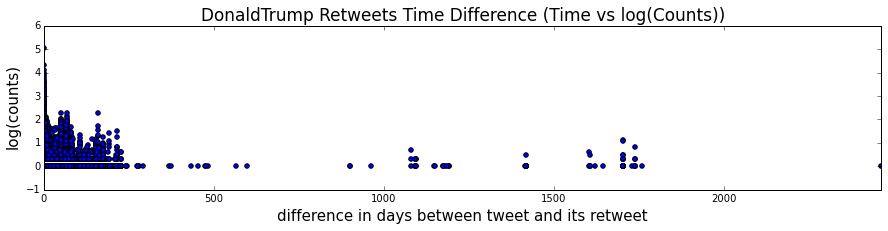

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
from collections import defaultdict


names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['DataUserConverted2']

# Combine them and save them
for i in range(len(names)) :
    print 'Processing %s' %(names[i])
    fileName = "./FinalData/%s%s.csv" %(names[i], types[0])
    plt.figure(i, figsize = (15,10))
    with open(fileName, 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)
    
    freq = defaultdict(int)
    
    for a in range(len(data)):
        if data[a][15] != '-1' :
            diff = float(data[a][0]) - float(data[a][15])
            diffMin = diff / 60
            diffHour = diffMin / 60
            diffDay = diffHour / 24
            diffDay = round(diffDay, 2)
            freq[diffDay] += 1
            if (diffDay > 2000):
                print data[a]
    freq[0.01] += freq[0]
    freq.pop(0)

    loc = '%d%d%d' %(len(names),1, i+1)
    print loc
    plt.subplot(int(loc))
        
    x = list(freq.keys())
    y = list(freq.values())
    sumTotal=0
    
    xlog = np.log10(x)
    ylog = np.log10(y)
    
    plt.scatter(x,ylog)
    plt.xlim(0,max(x)+1)    
    plt.xlabel('difference in days between tweet and its retweet', fontsize= 15)
    plt.ylabel('log(counts)',fontsize = 15)
    title = '%s Retweets Time Difference (Time vs log(Counts))' %(names[i])
    print title
    plt.title(title, fontsize = 17)

    

    
    


### Print the log vs log

Processing HillaryClinton
['1454117838.0', '693171080899510273', '186', '-1', '', 'RT @BreakingNews: State Dept. confirms it will withhold 7 Clinton email chains; notes documents not classified at time they were sent https\xe2\x80\xa6', '[]', "[[1907, 'Unknown']]", "[u'Breaking News']", '762', 'Breaking Politics', 'breakingpol', '200', '59493', '8578', '1454117838.0', '693171079204970497', '186', '1907', 'Breaking News', 'BreakingNews', '546', '8473166', '95780']
Min  : 0.0
Max  : 2872.1
Mean : 5.9848300232
Median  : 0.03
Sampling Complete. Computing plfit
plfit complete. Now finding best B
HillaryClinton Retweets Time Difference (log(Time) vs log(Counts))   gamma : 1.4642  R-sq : -0.9090
Processing BernieSanders
['1454215660.0', '693581376101027840', '32', '-1', '', 'RT @pmarca: "I personally happen not to be a great believer in the free enterprise system for many reasons." https://t.co/BLH0GbAOOA', '[]', '[7231]', "[u'Marc Andreessen']", '30479', 'RT pmarca', 'rtpmarca', '1', '142', 

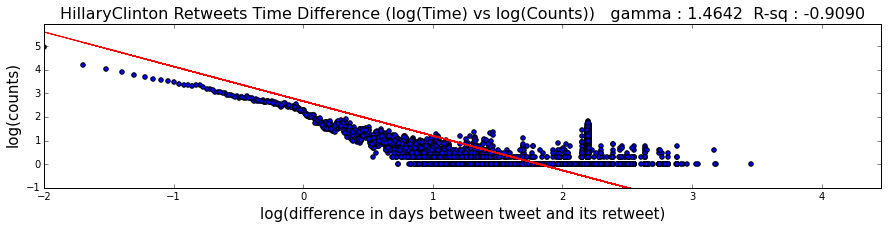

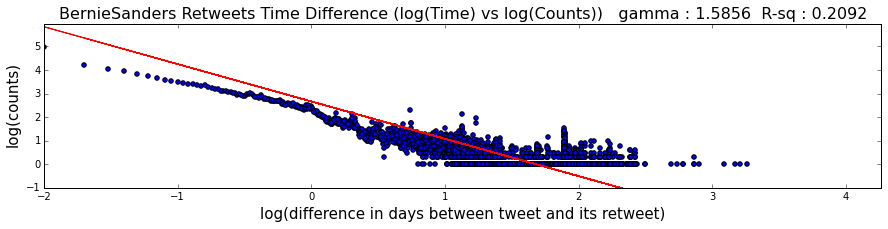

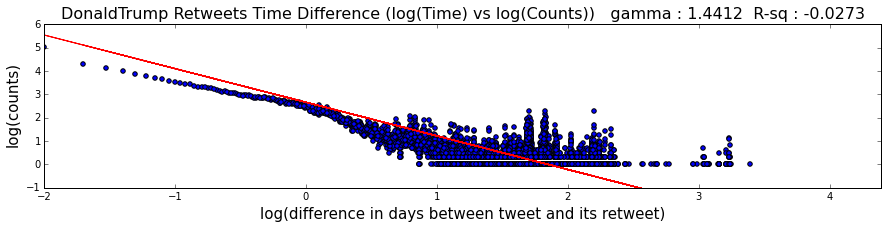

In [6]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy


names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['DataUserConverted2']

# Combine them and save them
for i in range(len(names)) :
    print 'Processing %s' %(names[i])
    fileName = "./FinalData/%s%s.csv" %(names[i], types[0])
    plt.figure(i, figsize = (15,10))
    with open(fileName, 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)
    
    freq = defaultdict(int)
    aggregate = []
    minLength = 1000000
    for a in range(len(data)):
        if data[a][15] != '-1' :
            diff = float(data[a][0]) - float(data[a][15])
            if(diff< minLength and diff == 0):
                minLength = diff
                print data[a]
            diffMin = diff / 60
            diffHour = diffMin / 60
            diffDay = diffHour / 24
            diffDay = round(diffDay, 2)
            freq[diffDay] += 1
            if(diffDay == 0) :
                aggregate.append(0.01)
            else : 
                aggregate.append(diffDay)
    freq[0.01] += freq[0]
    freq.pop(0)
    
    loc = '%d%d%d' %(len(names),1, i+1)
    plt.subplot(int(loc))
        
    x = list(freq.keys())
    y = list(freq.values())
    xlog = np.log10(x)
    ylog = np.log10(y)
    
    sumTotal = 0
    totalCount = 0
    for index in range(len(x)):
        sumTotal += x[index]*y[index]
        totalCount += y[index]
    maxLength = max(x)
    med = np.median(aggregate)
    print "Min  : %s" %(minLength)
    print "Max  : %s" %(maxLength)
    print "Mean : %s" %(sumTotal / totalCount)
    print "Median  : %s" %(med)
        
    plt.scatter(xlog,ylog)
    plt.xlim(-2,max(xlog)+1)    
    plt.ylim(-1,max(ylog)+1)
    
    aggregateLog = np.log10(aggregate)

    sample_size = 5000
    sample = random.sample(aggregate, sample_size)
    print 'Sampling Complete. Computing plfit'

    [alpha, xmin, L] = plfit(sample)
    print 'plfit complete. Now finding best B'

    bestB = 0;
    bestMSE = sum(ylog);

    bcandidates = np.linspace(0,8,100)
    for bcandidate in bcandidates:
        diff = -1*alpha*xlog + bcandidate - ylog
        diffsq = np.power(diff,2)
        mse = np.mean(diffsq)
        if(mse < bestMSE):
            bestMSE = mse
            bestB = bcandidate

    plt.plot(xlog, -1*alpha*xlog + bestB, 'r-')
    plt.xlabel('log(difference in days between tweet and its retweet)', fontsize= 15)
    plt.ylabel('log(counts)',fontsize = 15)
    
    yhat = -1*alpha*xlog + bestB

    # fit values, and mean
    ybar = numpy.sum(ylog)/len(ylog)          
    sstot = numpy.sum((ylog - ybar)**2)   
    ssres = numpy.sum((ylog - yhat)**2)    
    rsq = 1 - (ssres / sstot)
        
    title = '%s Retweets Time Difference (log(Time) vs log(Counts))   gamma : %s  R-sq : %s' %(names[i],"{:.4f}".format(alpha),"{:.4f}".format(rsq))
    print title
    plt.title(title,fontsize = 16)

In [98]:
np.median(x)

41.914999999999999

### Plot the tweet timeline

Processing HillaryClinton
HillaryClinton Tweets Over Time (Time vs log(Counts))
Processing BernieSanders
BernieSanders Tweets Over Time (Time vs log(Counts))
Processing DonaldTrump
DonaldTrump Tweets Over Time (Time vs log(Counts))


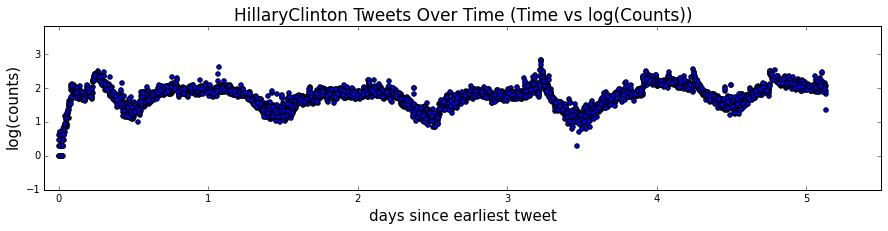

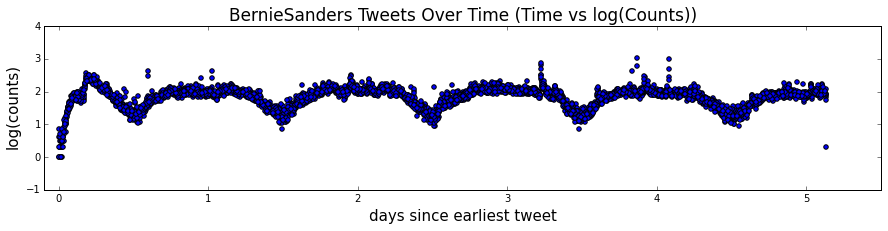

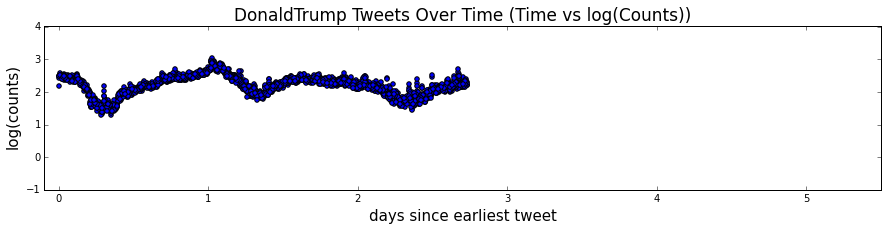

In [8]:
# Print the log vs log
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from collections import defaultdict


names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['DataUserConverted2']

# Combine them and save them
for i in range(len(names)) :
    print 'Processing %s' %(names[i])
    fileName = "./FinalData/%s%s.csv" %(names[i], types[0])
    plt.figure(i, figsize = (15,10))
    with open(fileName, 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)
    
    freq = defaultdict(int)
    minDate = float(data[len(data)-1][0])-1
    
    for a in range(len(data)):        
        date = float(data[a][0]) - minDate
        dateMin = date / 60
        dateHour = dateMin / 60
        dateDay = round(dateHour / 24 , 3)
        freq[dateDay] += 1
            
    #freq[0.01] += freq[0]
    #freq.pop(0)
    
    loc = '%d%d%d' %(len(names),1, i+1)
    plt.subplot(int(loc))
        
    x = list(freq.keys())
    y = list(freq.values())
    #xlog = np.log10(x)
    ylog = np.log10(y)
        
    plt.scatter(x,ylog)
    plt.xlim(-0.1,5.5)    
    plt.ylim(-1,max(ylog)+1)
    plt.xlabel('days since earliest tweet',fontsize=15)
    plt.ylabel('log(counts)',fontsize=15)

    title = '%s Tweets Over Time (Time vs log(Counts))' %(names[i])
    print title
    plt.title(title,fontsize = 17)

Processing HillaryClinton
1205830402.0
HillaryClinton Tweets Over Time (log(Time) vs log(Counts)) - Including Retweets
Processing BernieSanders
1296028493.0
BernieSanders Tweets Over Time (log(Time) vs log(Counts)) - Including Retweets
Processing DonaldTrump
1241477665.0
DonaldTrump Tweets Over Time (log(Time) vs log(Counts)) - Including Retweets


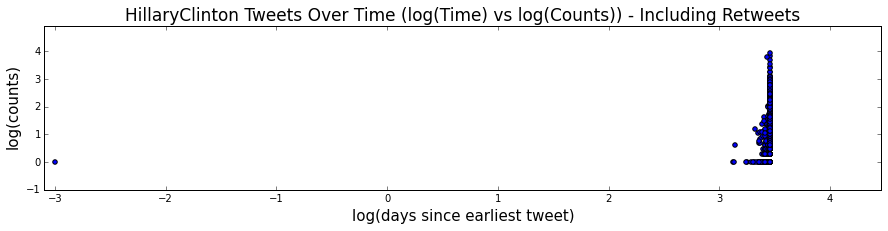

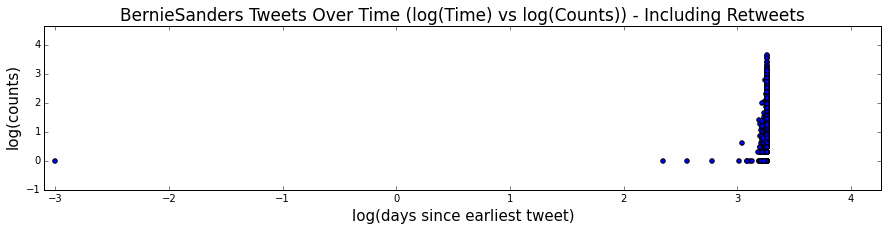

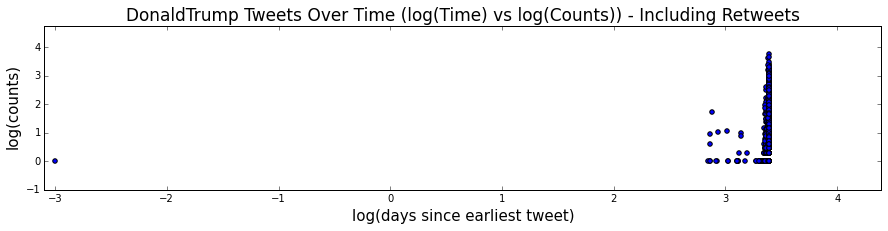

In [10]:
# Print the log vs log
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from collections import defaultdict


names = ['HillaryClinton','BernieSanders','DonaldTrump']
types = ['DataUserConverted2']

# Combine them and save them
for i in range(len(names)) :
    print 'Processing %s' %(names[i])
    fileName = "./FinalData/%s%s.csv" %(names[i], types[0])
    plt.figure(i, figsize = (15,10))
    with open(fileName, 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)
    
    freq = defaultdict(int)
    minDate = float(data[len(data)-1][0])
    for a in range(len(data)):
        if data[a][15] != '-1' :
            if(float(data[a][15]) < minDate):
                minDate = float(data[a][15])
    
    print(minDate)
    
    for a in range(len(data)):
        date = float(data[a][0]) - minDate
        dateMin = date / 60
        dateHour = dateMin / 60
        dateDay = round(dateHour / 24 , 3)
        if dateDay >= 0:
            freq[dateDay] += 1
        if data[a][15] != '-1' :
            date = float(data[a][15]) - minDate
            if date >= 0:
                dateMin = date / 60
                dateHour = dateMin / 60
                dateDay = round(dateHour / 24 , 3)
                freq[dateDay] += 1
            
    freq[0.001] += freq[0]
    freq.pop(0)
    
    loc = '%d%d%d' %(len(names),1, i+1)
    plt.subplot(int(loc))
        
    x = list(freq.keys())
    y = list(freq.values())
    xlog = np.log10(x)
    ylog = np.log10(y)
        
    plt.scatter(xlog,ylog)
    plt.xlim(min(xlog)-0.1,max(xlog)+1)    
    plt.ylim(-1,max(ylog)+1)
    plt.xlabel('log(days since earliest tweet)',fontsize=15)
    plt.ylabel('log(counts)',fontsize=15)

    title = '%s Tweets Over Time (log(Time) vs log(Counts)) - Including Retweets' %(names[i])
    print title
    plt.title(title,fontsize=17)

1

In [5]:
from math import *

# function [alpha, xmin, L]=plfit(x, varargin)
# PLFIT fits a power-law distributional model to data.
#    Source: http://www.santafe.edu/~aaronc/powerlaws/
# 
#    PLFIT(x) estimates x_min and alpha according to the goodness-of-fit
#    based method described in Clauset, Shalizi, Newman (2007). x is a 
#    vector of observations of some quantity to which we wish to fit the 
#    power-law distribution p(x) ~  x^-alpha for x >= xmin.
#    PLFIT automatically detects whether x is composed of real or integer
#    values, and applies the appropriate method. For discrete data, if
#    min(x) > 1000, PLFIT uses the continuous approximation, which is 
#    a reliable in this regime.
#   
#    The fitting procedure works as follows:
#    1) For each possible choice of x_min, we estimate alpha via the 
#       method of maximum likelihood, and calculate the Kolmogorov-Smirnov
#       goodness-of-fit statistic D.
#    2) We then select as our estimate of x_min, the value that gives the
#       minimum value D over all values of x_min.
#
#    Note that this procedure gives no estimate of the uncertainty of the 
#    fitted parameters, nor of the validity of the fit.
#
#    Example:
#       x = [500,150,90,81,75,75,70,65,60,58,49,47,40]
#       [alpha, xmin, L] = plfit(x)
#   or  a = plfit(x)
#
#    The output 'alpha' is the maximum likelihood estimate of the scaling
#    exponent, 'xmin' is the estimate of the lower bound of the power-law
#    behavior, and L is the log-likelihood of the data x>=xmin under the
#    fitted power law.
#    
#    For more information, try 'type plfit'
#
#    See also PLVAR, PLPVA

# Version 1.0.10 (2010 January)
# Copyright (C) 2008-2011 Aaron Clauset (Santa Fe Institute)

# Ported to Python by Joel Ornstein (2011 July)
# (joel_ornstein@hmc.edu)

# Distributed under GPL 2.0
# http://www.gnu.org/copyleft/gpl.html
# PLFIT comes with ABSOLUTELY NO WARRANTY
#
# 
# The 'zeta' helper function is modified from the open-source library 'mpmath'
#   mpmath: a Python library for arbitrary-precision floating-point arithmetic
#   http://code.google.com/p/mpmath/
#   version 0.17 (February 2011) by Fredrik Johansson and others
# 

# Notes:
# 
# 1. In order to implement the integer-based methods in Matlab, the numeric
#    maximization of the log-likelihood function was used. This requires
#    that we specify the range of scaling parameters considered. We set
#    this range to be 1.50 to 3.50 at 0.01 intervals by default. 
#    This range can be set by the user like so,
#    
#       a = plfit(x,'range',[1.50,3.50,0.01])
#    
# 2. PLFIT can be told to limit the range of values considered as estimates
#    for xmin in three ways. First, it can be instructed to sample these
#    possible values like so,
#    
#       a = plfit(x,'sample',100)
#    
#    which uses 100 uniformly distributed values on the sorted list of
#    unique values in the data set. Second, it can simply omit all
#    candidates above a hard limit, like so
#    
#       a = plfit(x,'limit',3.4)
#    
#    Finally, it can be forced to use a fixed value, like so
#    
#       a = plfit(x,'xmin',3.4)
#    
#    In the case of discrete data, it rounds the limit to the nearest
#    integer.
# 
# 3. When the input sample size is small (e.g., < 100), the continuous 
#    estimator is slightly biased (toward larger values of alpha). To
#    explicitly use an experimental finite-size correction, call PLFIT like
#    so
#    
#       a = plfit(x,'finite')
#    
#    which does a small-size correction to alpha.
#
# 4. For continuous data, PLFIT can return erroneously large estimates of 
#    alpha when xmin is so large that the number of obs x >= xmin is very 
#    small. To prevent this, we can truncate the search over xmin values 
#    before the finite-size bias becomes significant by calling PLFIT as
#    
#       a = plfit(x,'nosmall')
#    
#    which skips values xmin with finite size bias > 0.1.

def plfit(x, *varargin):
    vec     = []
    sample  = []
    xminx   = []
    limit   = []
    finite  = False
    nosmall = False
    nowarn  = False

    # parse command-line parameters trap for bad input
    i=0 
    while i<len(varargin): 
        argok = 1 
        if type(varargin[i])==str: 
            if varargin[i]=='range':
                Range = varargin[i+1]
                if Range[1]>Range[0]:
                    argok=0
                    vec=[]
                try:
                    vec=map(lambda X:X*float(Range[2])+Range[0],\
                            range(int((Range[1]-Range[0])/Range[2])))
                    
                    
                except:
                    argok=0
                    vec=[]
                    

                if Range[0]>=Range[1]:
                    argok=0
                    vec=[]
                    i-=1

                i+=1
                    
                            
            elif varargin[i]== 'sample':
                sample  = varargin[i+1]
                i = i + 1
            elif varargin[i]==  'limit':
                limit   = varargin[i+1]
                i = i + 1
            elif varargin[i]==  'xmin':
                xminx   = varargin[i+1]
                i = i + 1
            elif varargin[i]==  'finite':       finite  = True    
            elif varargin[i]==  'nowarn':       nowarn  = True    
            elif varargin[i]==  'nosmall':      nosmall = True    
            else: argok=0 
        
      
        if not argok:
            print '(PLFIT) Ignoring invalid argument #',i+1 
      
        i = i+1 

    if vec!=[] and (type(vec)!=list or min(vec)<=1):
        print '(PLFIT) Error: ''range'' argument must contain a vector or minimum <= 1. using default.\n'                        
              
        vec = []
    
    if sample!=[] and sample<2:
        print'(PLFIT) Error: ''sample'' argument must be a positive integer > 1. using default.\n'
        sample = []
    
    if limit!=[] and limit<min(x):
        print'(PLFIT) Error: ''limit'' argument must be a positive value >= 1. using default.\n'
        limit = []
    
    if xminx!=[] and xminx>=max(x):
        print'(PLFIT) Error: ''xmin'' argument must be a positive value < max(x). using default behavior.\n'
        xminx = []
    


    # select method (discrete or continuous) for fitting
    if     reduce(lambda X,Y:X==True and floor(Y)==float(Y),x,True): f_dattype = 'INTS'
    elif reduce(lambda X,Y:X==True and (type(Y)==int or type(Y)==float or type(Y)==long),x,True):    f_dattype = 'REAL'
    else:                 f_dattype = 'UNKN'
    
    if f_dattype=='INTS' and min(x) > 1000 and len(x)>100:
        f_dattype = 'REAL'
    

    # estimate xmin and alpha, accordingly
        
    if f_dattype== 'REAL':
        xmins = unique(x)
        xmins.sort()
        xmins = xmins[0:-1]
        if xminx!=[]:
            
            xmins = [min(filter(lambda X: X>=xminx,xmins))]
            
        
        if limit!=[]:
            xmins=filter(lambda X: X<=limit,xmins)
            if xmins==[]: xmins = [min(x)]
            
        if sample!=[]:
            step = float(len(xmins))/(sample-1)
            index_curr=0
            new_xmins=[]
            for i in range (0,sample):
                if round(index_curr)==len(xmins): index_curr-=1
                new_xmins.append(xmins[int(round(index_curr))])
                index_curr+=step
            xmins = unique(new_xmins)
            xmins.sort()
            
            
        
        dat   = []
        z     = sorted(x)
        
        for xm in range(0,len(xmins)):
            xmin = xmins[xm]
            z    = filter(lambda X:X>=xmin,z)
            
            n    = len(z)
            # estimate alpha using direct MLE

            a    = float(n) / sum(map(lambda X: log(float(X)/xmin),z))
            if nosmall:
                if (a-1)/sqrt(n) > 0.1 and dat!=[]:
                    xm = len(xmins)+1
                    break
                
            
            # compute KS statistic
            #cx   = map(lambda X:float(X)/n,range(0,n))
            cf   = map(lambda X:1-pow((float(xmin)/X),a),z)
            dat.append( max( map(lambda X: abs(cf[X]-float(X)/n),range(0,n))))
        D     = min(dat)
        xmin  = xmins[dat.index(D)]
        z     = filter(lambda X:X>=xmin,x)
        z.sort()
        n     = len(z) 
        alpha = 1 + n / sum(map(lambda X: log(float(X)/xmin),z))
        if finite: alpha = alpha*float(n-1)/n+1./n  # finite-size correction
        if n < 50 and not finite and not nowarn:
            print '(PLFIT) Warning: finite-size bias may be present.\n'
        
        L = n*log((alpha-1)/xmin) - alpha*sum(map(lambda X: log(float(X)/xmin),z))
    elif f_dattype== 'INTS':
        
        x=map(int,x)
        if vec==[]:
            for X in range(150,351):
                vec.append(X/100.)    # covers range of most practical 
                                    # scaling parameters
        zvec = map(zeta, vec)
        
        xmins = unique(x)
        xmins.sort()
        xmins = xmins[0:-1]
        if xminx!=[]:
            xmins = [min(filter(lambda X: X>=xminx,xmins))]
        
        if limit!=[]:
            limit = round(limit)
            xmins=filter(lambda X: X<=limit,xmins)
            if xmins==[]: xmins = [min(x)]
        
        if sample!=[]:
            step = float(len(xmins))/(sample-1)
            index_curr=0
            new_xmins=[]
            for i in range (0,sample):
                if round(index_curr)==len(xmins): index_curr-=1
                new_xmins.append(xmins[int(round(index_curr))])
                index_curr+=step
            xmins = unique(new_xmins)
            xmins.sort()
        
        if xmins==[]:
            print '(PLFIT) Error: x must contain at least two unique values.\n'
            alpha = 'Not a Number'
            xmin = x[0]
            D = 'Not a Number'
            return [alpha,xmin,D]
        
        xmax   = max(x)
        
        z      = x
        z.sort()
        datA=[]
        datB=[]

        for xm in range(0,len(xmins)):
            xmin = xmins[xm]
            z    = filter(lambda X:X>=xmin,z)
            n    = len(z)
            # estimate alpha via direct maximization of likelihood function

            # force iterative calculation 
            L       = []
            slogz   = sum(map(log,z))
            xminvec = map(float,range(1,xmin))
            for k in range(0,len(vec)):
                L.append(-vec[k]*float(slogz) - float(n)*log(float(zvec[k]) - sum(map(lambda X:pow(float(X),-vec[k]),xminvec))))
            
            
            I = L.index(max(L))
            # compute KS statistic
            fit = reduce(lambda X,Y: X+[Y+X[-1]],\
                         (map(lambda X: pow(X,-vec[I])/(float(zvec[I])-sum(map(lambda X: pow(X,-vec[I]),map(float,range(1,xmin))))),range(xmin,xmax+1))),[0])[1:]
            cdi=[]
            for XM in range(xmin,xmax+1):
                cdi.append(len(filter(lambda X: floor(X)<=XM,z))/float(n))
            
            datA.append(max( map(lambda X: abs(fit[X] - cdi[X]),range(0,xmax-xmin+1))))
            datB.append(vec[I])
        # select the index for the minimum value of D
        I = datA.index(min(datA))
        xmin  = xmins[I]
        z     = filter(lambda X:X>=xmin,x)
        n     = len(z)
        alpha = datB[I]
        if finite: alpha = alpha*(n-1.)/n+1./n  # finite-size correction
        if n < 50 and not finite and not nowarn:
            print '(PLFIT) Warning: finite-size bias may be present.\n'
        
        L     = -alpha*sum(map(log,z)) - n*log(zvec[vec.index(max(filter(lambda X:X<=alpha,vec)))] - \
                                              sum(map(lambda X: pow(X,-alpha),range(1,xmin))))
    else:
        print '(PLFIT) Error: x must contain only reals or only integers.\n'
        alpha = []
        xmin  = []
        L     = []

    return [alpha,xmin,L]


# helper functions (unique and zeta)


def unique(seq): 
    # not order preserving 
    set = {} 
    map(set.__setitem__, seq, []) 
    return set.keys()

def _polyval(coeffs, x):
    p = coeffs[0]
    for c in coeffs[1:]:
        p = c + x*p
    return p

_zeta_int = [\
-0.5,
0.0,
1.6449340668482264365,1.2020569031595942854,1.0823232337111381915,
1.0369277551433699263,1.0173430619844491397,1.0083492773819228268,
1.0040773561979443394,1.0020083928260822144,1.0009945751278180853,
1.0004941886041194646,1.0002460865533080483,1.0001227133475784891,
1.0000612481350587048,1.0000305882363070205,1.0000152822594086519,
1.0000076371976378998,1.0000038172932649998,1.0000019082127165539,
1.0000009539620338728,1.0000004769329867878,1.0000002384505027277,
1.0000001192199259653,1.0000000596081890513,1.0000000298035035147,
1.0000000149015548284]

_zeta_P = [-3.50000000087575873, -0.701274355654678147,
-0.0672313458590012612, -0.00398731457954257841,
-0.000160948723019303141, -4.67633010038383371e-6,
-1.02078104417700585e-7, -1.68030037095896287e-9,
-1.85231868742346722e-11][::-1]

_zeta_Q = [1.00000000000000000, -0.936552848762465319,
-0.0588835413263763741, -0.00441498861482948666,
-0.000143416758067432622, -5.10691659585090782e-6,
-9.58813053268913799e-8, -1.72963791443181972e-9,
-1.83527919681474132e-11][::-1]

_zeta_1 = [3.03768838606128127e-10, -1.21924525236601262e-8,
2.01201845887608893e-7, -1.53917240683468381e-6,
-5.09890411005967954e-7, 0.000122464707271619326,
-0.000905721539353130232, -0.00239315326074843037,
0.084239750013159168, 0.418938517907442414, 0.500000001921884009]

_zeta_0 = [-3.46092485016748794e-10, -6.42610089468292485e-9,
1.76409071536679773e-7, -1.47141263991560698e-6, -6.38880222546167613e-7,
0.000122641099800668209, -0.000905894913516772796, -0.00239303348507992713,
0.0842396947501199816, 0.418938533204660256, 0.500000000000000052]

def zeta(s):
    """
    Riemann zeta function, real argument
    """
    if not isinstance(s, (float, int)):
        try:
            s = float(s)
        except (ValueError, TypeError):
            try:
                s = complex(s)
                if not s.imag:
                    return complex(zeta(s.real))
            except (ValueError, TypeError):
                pass
            raise NotImplementedError
    if s == 1:
        raise ValueError("zeta(1) pole")
    if s >= 27:
        return 1.0 + 2.0**(-s) + 3.0**(-s)
    n = int(s)
    if n == s:
        if n >= 0:
            return _zeta_int[n]
        if not (n % 2):
            return 0.0
    if s <= 0.0:
        return 0
    if s <= 2.0:
        if s <= 1.0:
            return _polyval(_zeta_0,s)/(s-1)
        return _polyval(_zeta_1,s)/(s-1)
    z = _polyval(_zeta_P,s) / _polyval(_zeta_Q,s)
    return 1.0 + 2.0**(-s) + 3.0**(-s) + 4.0**(-s)*z



    